<a href="https://colab.research.google.com/github/quangminh141005/Image_detection/blob/main/ASL_detect_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is the testing part

In [8]:
import struct

data = b'\x00\x00\x08\x03\x00\x00\xea\x60\x00\x00\x00\x1c\x00\x00\x00\x1c'
magic, num_images, row, cols = struct.unpack('>IIII', data)

print("Magic:", magic)         # 2051
print("Number of images:", num_images)  # 60000
print("Rows:", row)            # 28
print("Cols:", cols)           # 28


Magic: 2051
Number of images: 60000
Rows: 28
Cols: 28


In [9]:
filename = "/train-images.idx3-ubyte"

with open(filename, 'rb') as f:
  data = f.read()

In [10]:
print("First 20 bytes (hex):", data[:20].hex())

First 20 bytes (hex): 000008030000ea600000001c0000001c00000000


In [11]:
import struct

# First 4 bytes
magic = struct.unpack('>I', data[:4])[0]
print("Magic number: ", magic)

# Next 4 bytes
num_images = struct.unpack('>I', data[4:8])[0]
print("Number of images:", num_images)

# Next 4 bytes
rows = struct.unpack('>I', data[8:12])[0]
cols = struct.unpack('>I', data[12:16])[0]
print(f"Image size: {rows} x {cols}")

Magic number:  2051
Number of images: 60000
Image size: 28 x 28


In [12]:
image_start = 16
image_size = rows * cols
first_image = data[image_start:image_start + image_size]

# Convert to list of pixel value
pixels = list(first_image)
print(pixels[:50]) # show first 50 pixels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


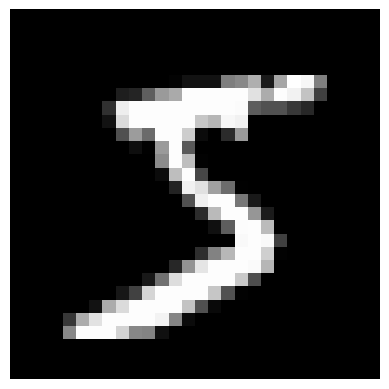

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(pixels).reshape(rows, cols), cmap='gray')
plt.axis('off')
plt.show()

## First step: Load and  prepare MNIST dataset

In [25]:
import numpy as np
import gzip
import struct

def load_images(filename):
  with open(filename, 'rb') as f:
    magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
    images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 1, rows, cols)
    return images.astype(np.float32) / 255.0

def load_labels(filename):
  with open(filename, 'rb') as f:
    magic, num = struct.unpack(">II", f.read(8))
    labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [26]:
X_train = load_images("/content/train-images.idx3-ubyte")
y_train = load_labels("/content/train-labels.idx1-ubyte")
X_test = load_images("/content/t10k-images.idx3-ubyte")
y_test = load_labels("/content/t10k-labels.idx1-ubyte")

print("Train images shape: ", X_train.shape)
print("Train labels shape: ", y_train.shape)
print("Test images shape: ", X_test.shape)

Train images shape:  (60000, 1, 28, 28)
Train labels shape:  (60000,)
Test images shape:  (10000, 1, 28, 28)
